In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/22/20,911,10267,2743,279,1725,3477,13989,544,116,1916
5/23/20,918,10577,3054,279,1819,3477,14422,550,116,1931
5/24/20,930,10926,3424,279,1915,3950,14801,552,116,1941
5/25/20,951,11183,3760,279,1983,4189,15073,556,116,1947


In [4]:
deaths.head()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0


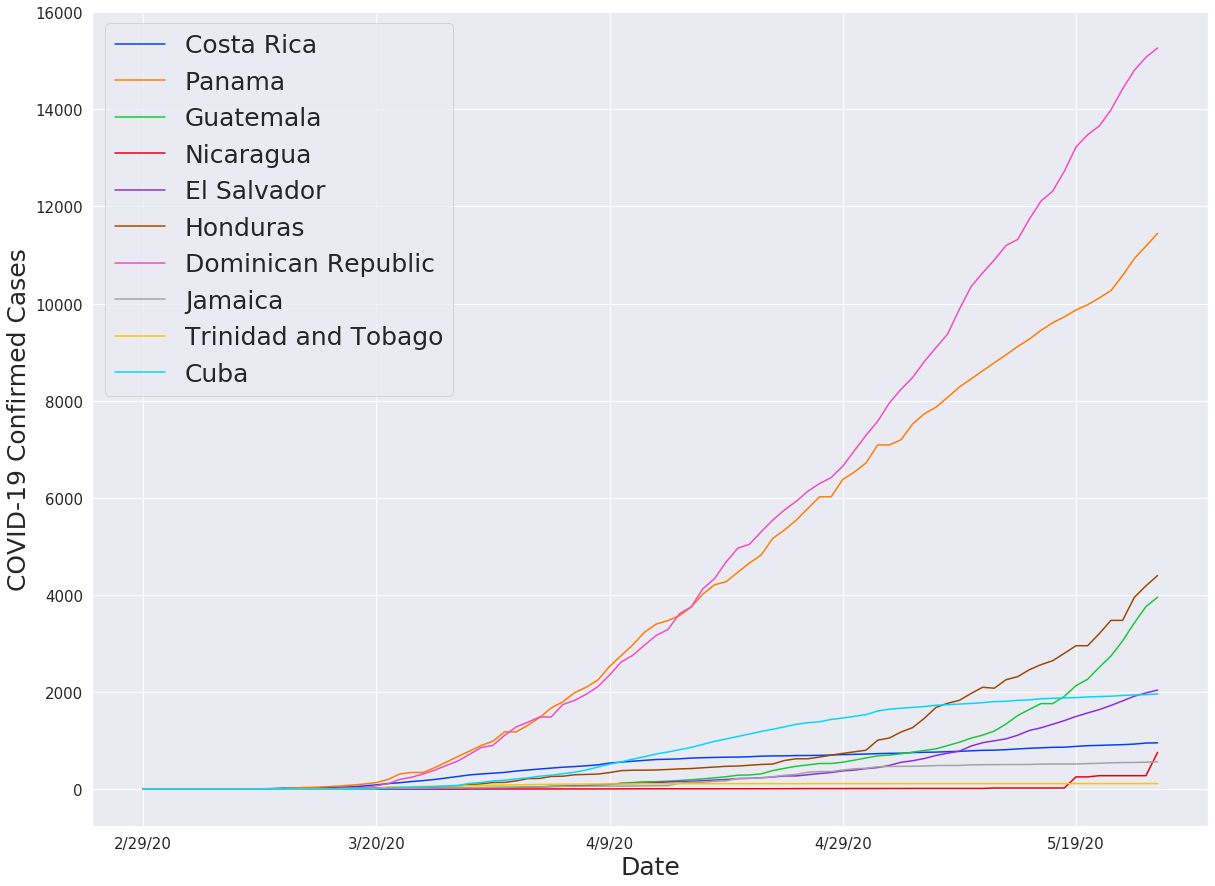

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

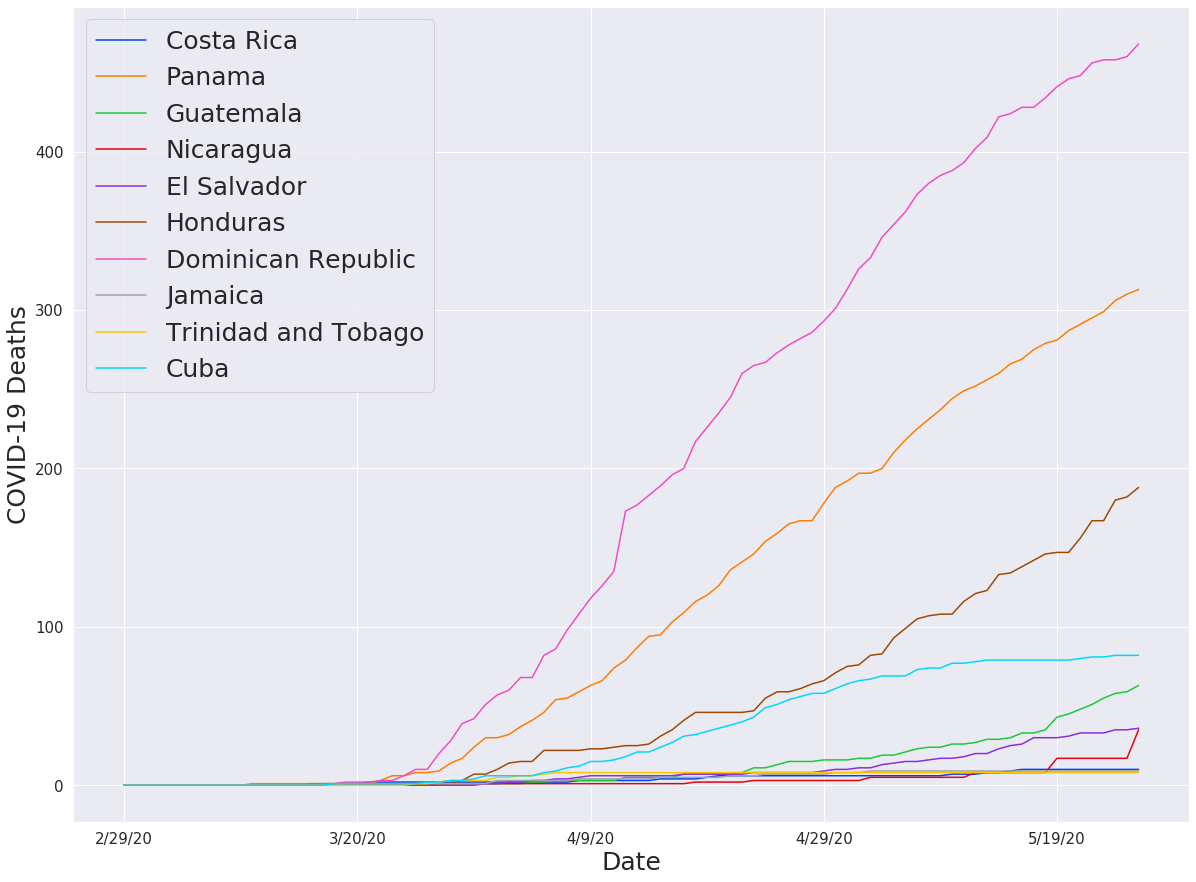

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
3/1/20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5/22/20,8.0,151.0,231.0,0.0,85.0,273.0,332.0,10.0,0.0,8.0
5/23/20,7.0,310.0,311.0,0.0,94.0,0.0,433.0,6.0,0.0,15.0
5/24/20,12.0,349.0,370.0,0.0,96.0,473.0,379.0,2.0,0.0,10.0
5/25/20,21.0,257.0,336.0,0.0,68.0,239.0,272.0,4.0,0.0,6.0


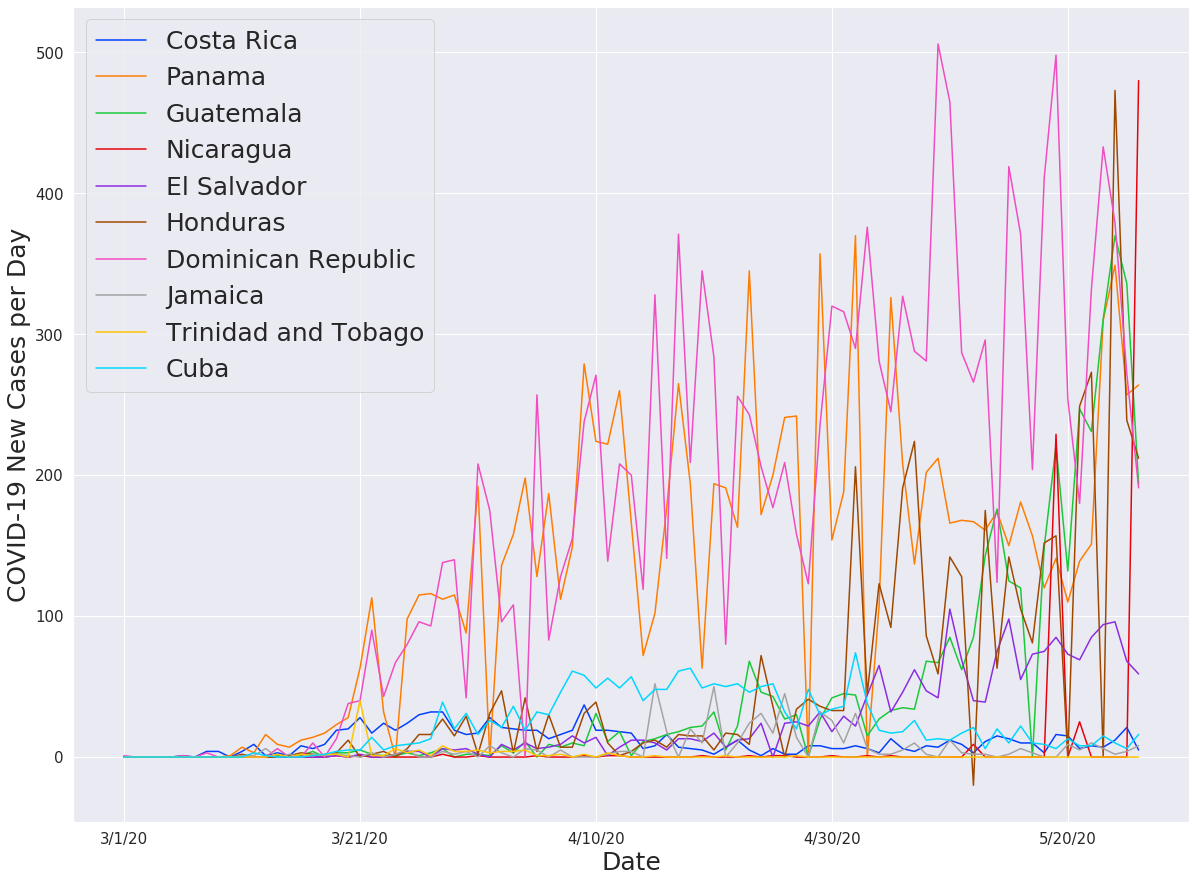

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

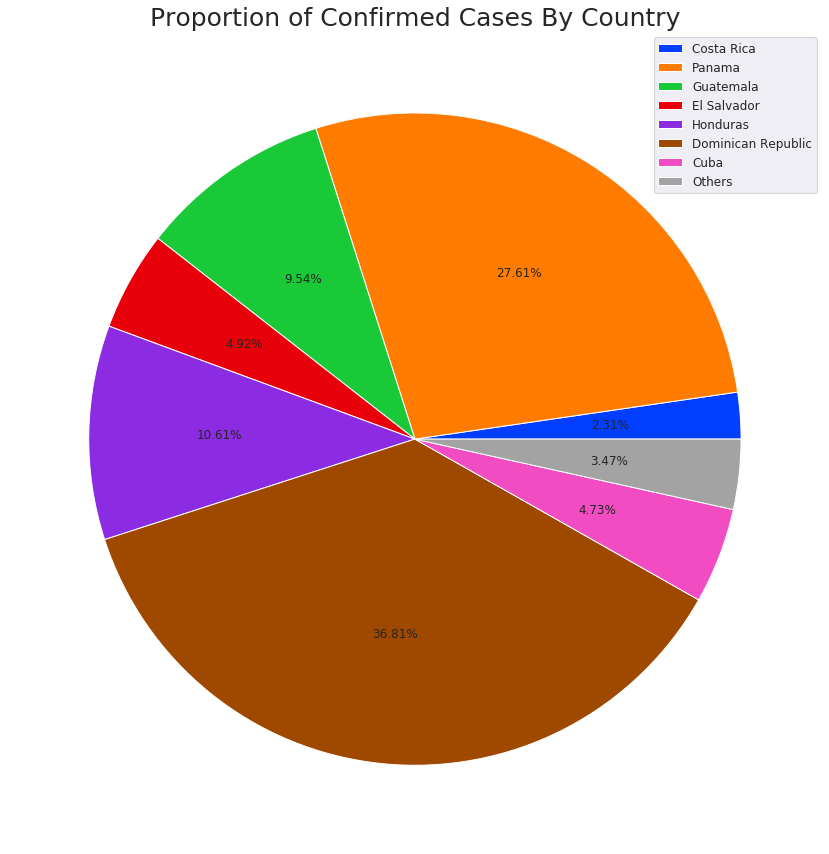

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

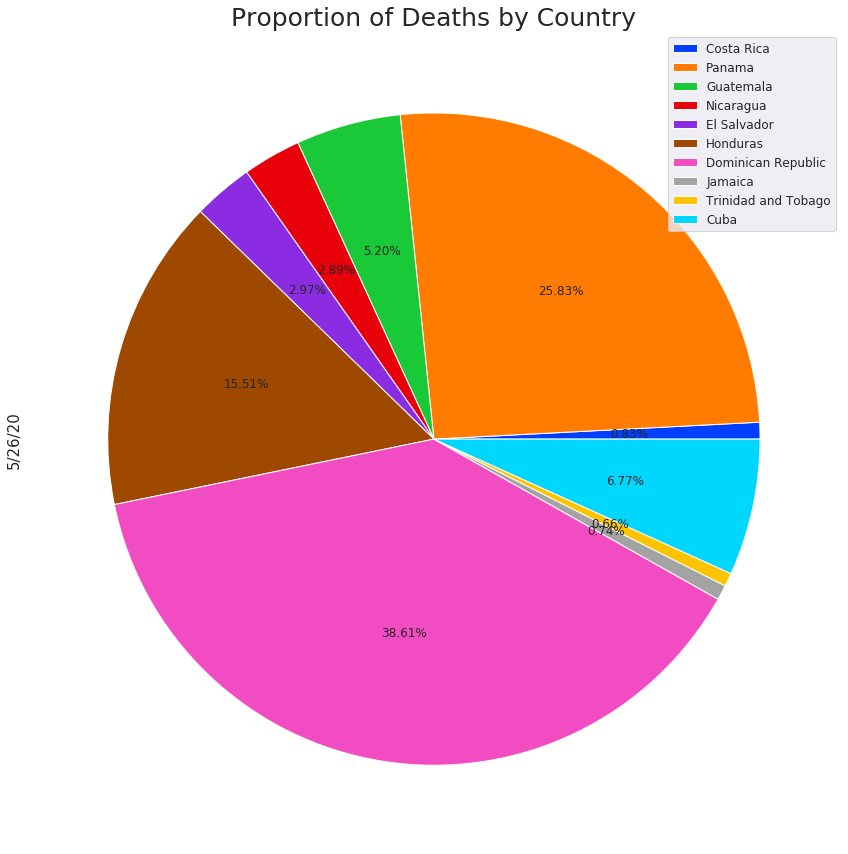

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/22/20,1.008859,1.014927,1.091959,1.00000,1.051829,1.085206,1.024310,1.018727,1.0,1.004193
5/23/20,1.007684,1.030194,1.113380,1.00000,1.054493,1.000000,1.030953,1.011029,1.0,1.007829
5/24/20,1.013072,1.032996,1.121153,1.00000,1.052776,1.136037,1.026279,1.003636,1.0,1.005179
5/25/20,1.022581,1.023522,1.098131,1.00000,1.035509,1.060506,1.018377,1.007246,1.0,1.003091


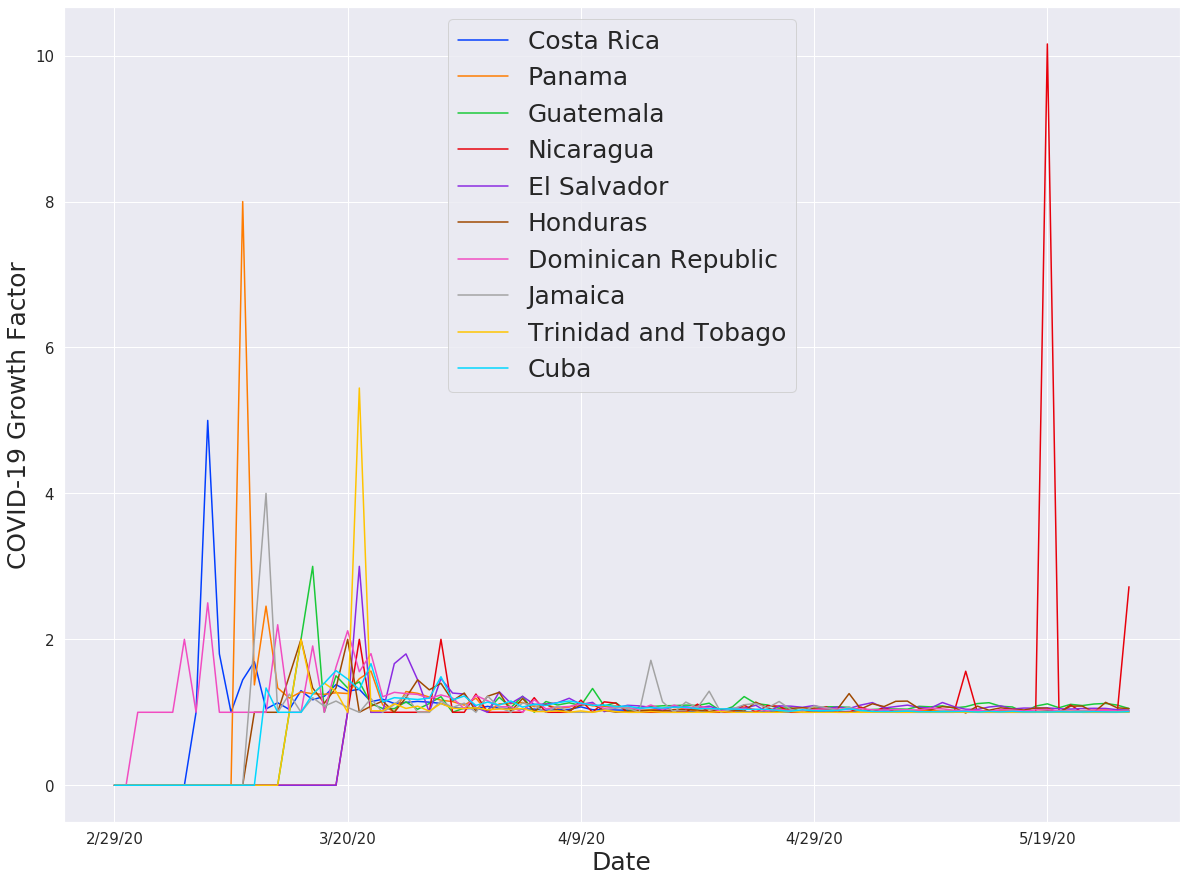

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,1.034203,1.051028,0.943468,0.943480,0.878692,0.965414,1.117146,0.962379,0.912153,0.935408
std,0.535135,0.854356,0.490997,1.119985,0.534012,0.421355,0.330844,0.513765,0.638211,0.411629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.007881,1.016111,1.014589,1.000000,1.000000,1.008271,1.019001,1.000000,1.000000,1.005086
50%,1.015524,1.036230,1.073741,1.000000,1.056329,1.043678,1.038788,1.010800,1.000000,1.023959
75%,1.052636,1.106663,1.113931,1.000000,1.093565,1.114424,1.084389,1.084052,1.011128,1.099115
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


In [17]:
growth_df.mean()

Costa Rica             1.034203
Panama                 1.051028
Guatemala              0.943468
Nicaragua              0.943480
El Salvador            0.878692
Honduras               0.965414
Dominican Republic     1.117146
Jamaica                0.962379
Trinidad and Tobago    0.912153
Cuba                   0.935408
dtype: float64

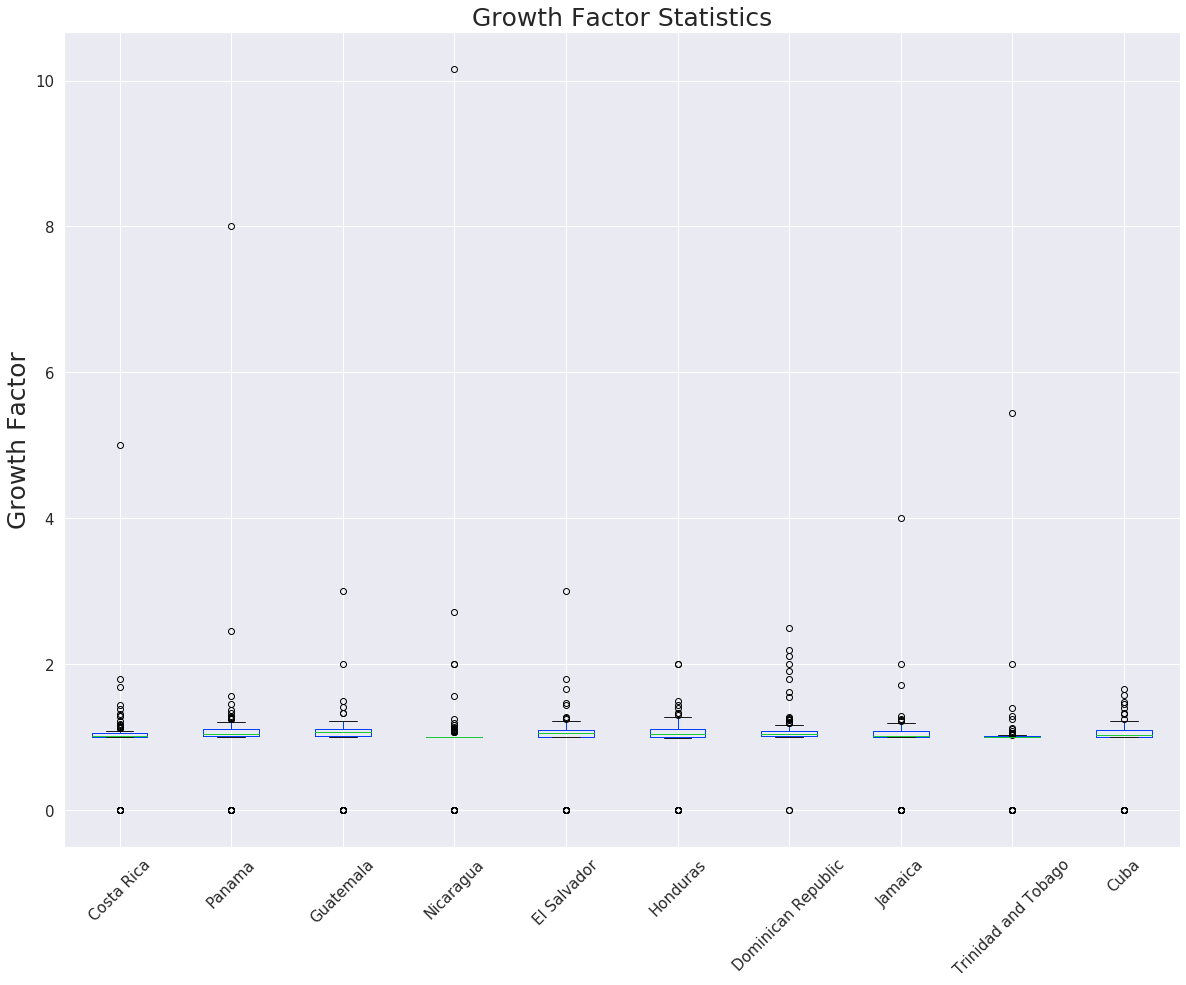

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

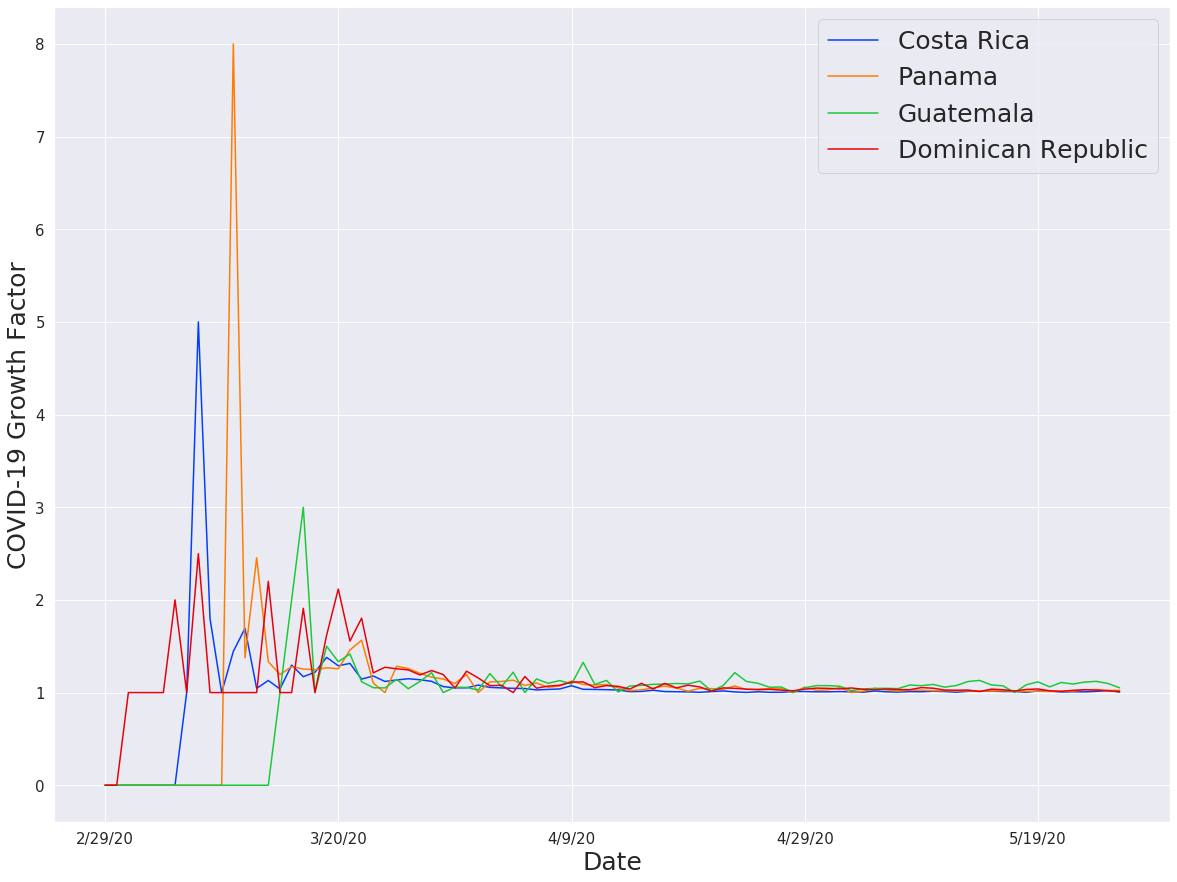

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,81.000000,77.000000,73.000000,68.000000,68.000000,76.000000,86.000000,76.000000,73.000000,75.000000
mean,1.123579,1.201175,1.137331,1.220974,1.137131,1.117847,1.143126,1.114334,1.099581,1.097546
std,0.457986,0.807989,0.260296,1.133549,0.268383,0.182418,0.286331,0.366880,0.532179,0.137283
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.990476,1.000000,1.000000,1.000000,1.000000
25%,1.008859,1.020043,1.052632,1.000000,1.051055,1.024764,1.020737,1.000000,1.000000,1.009909
50%,1.017937,1.045401,1.082345,1.000000,1.070218,1.055169,1.039075,1.019824,1.000000,1.045998
75%,1.064407,1.124055,1.119792,1.067857,1.107239,1.136710,1.093997,1.096506,1.020000,1.129172
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


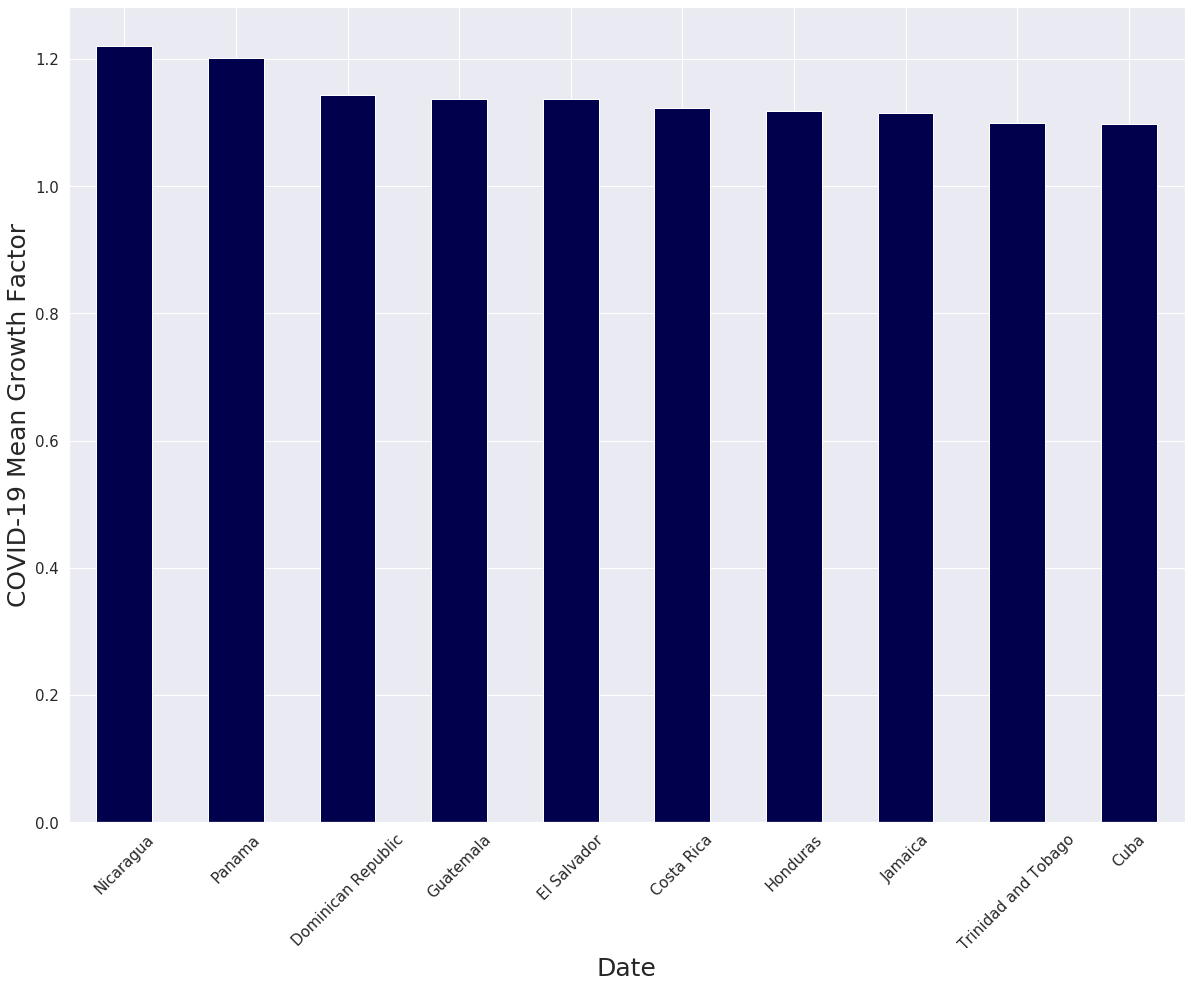

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

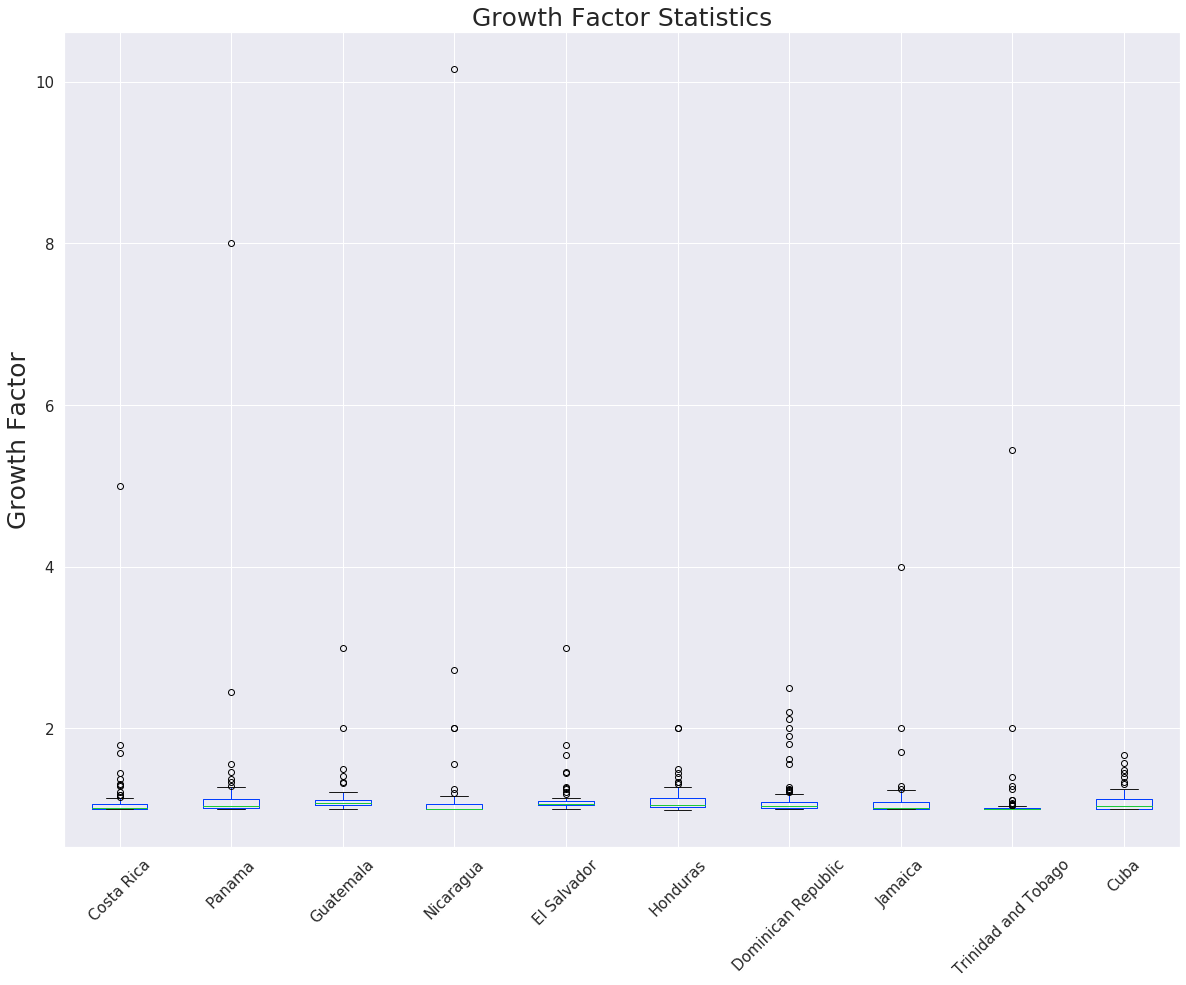

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

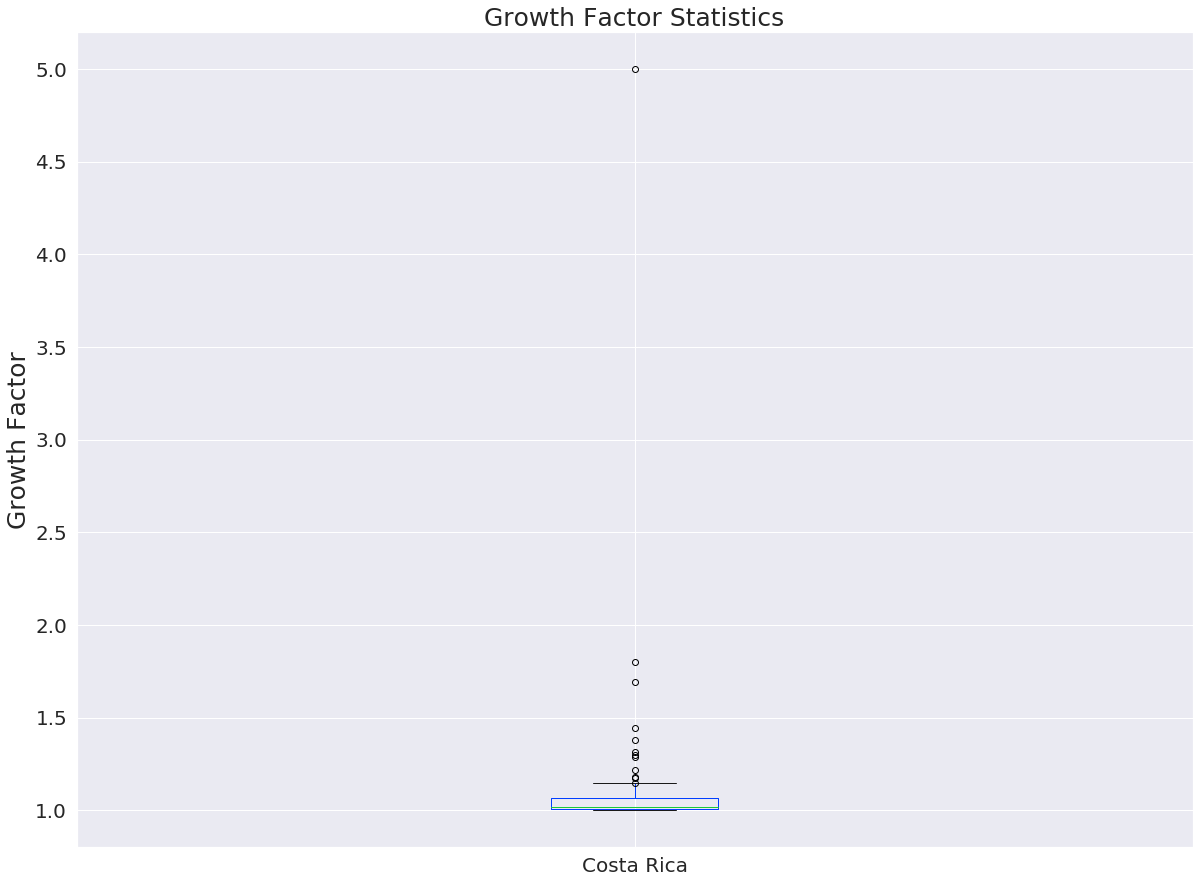

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()